In [4]:
import os
from collections import Counter
from pprint import pprint
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import json

# Install mac: https://www.pyimagesearch.com/2017/09/29/macos-for-deep-learning-with-python-tensorflow-and-keras/
from keras.preprocessing import image
import keras.applications.resnet50 as resnet50
import keras.applications.xception as xception
import keras.applications.inception_v3 as inception_v3

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
resnet_model = resnet50.ResNet50(weights='imagenet')
inception_model = inception_v3.InceptionV3(weights='imagenet')
xception_model = xception.Xception(weights='imagenet')

In [6]:
def image_classify(model, pak, img, top_n=3):
    """Classify image and return top matches."""
    target_size = (224, 224)
    if img.size != target_size:
        img = img.resize(target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = pak.preprocess_input(x)
    preds = model.predict(x)
    return pak.decode_predictions(preds, top=top_n)[0]


def classify_and_plot(image_path):
    """Classify an image with different models.
    """
    img = Image.open(image_path)
    resnet_preds = image_classify(resnet_model, resnet50, img)
    xception_preds = image_classify(xception_model, xception, img)
    inception_preds = image_classify(inception_model, inception_v3, img)
    
    cv_img = cv2.imread(image_path)
    gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)   # image grayscale pixels
    blur = variance_of_laplacian(gray)   # compute laplacian variance (blur value) 
    
    preds_arr = [('Resnet50', resnet_preds), ('xception', xception_preds), ('Inception', inception_preds)]
    return (img, cv_img, preds_arr, blur)


def variance_of_laplacian(image):
    """compute the Laplacian of the image and then return the focus
    measure, which is simply the variance of the Laplacian """
    return cv2.Laplacian(image, cv2.CV_64F).var()

def get_data_from_image(dat, show_img = False):
    if show_img:
        plt.imshow(dat[0])
    img_size = [dat[0].size[0], dat[0].size[1]]
    (means, stds) = cv2.meanStdDev(dat[1])
    mean_color = np.mean(dat[1].flatten())
    std_color = np.std(dat[1].flatten())
    color_stats = np.concatenate([means, stds]).flatten()
    scores = [i[1][0][2] for i in dat[2]]
    labels = [i[1][0][1] for i in dat[2]]
    blur = dat[3]
    df = pd.DataFrame([img_size + [blur] + [mean_color] + [std_color] + color_stats.tolist() + scores + labels],
                      columns = ['img_size_x', 'img_size_y', 'img_blur', 'img_mean_color', 'img_std_color', 'img_blue_mean', 'img_green_mean', 'img_red_mean', 'img_blue_std', 'img_green_std', 'img_red_std', 'Resnet50_score', 'xception_score', 'Inception_score', 'Resnet50_label', 'xception_label', 'Inception_label'])
    return df

In [7]:
DATA_PATH = "/home/u14303/Avito"
IMG_PATH = DATA_PATH + "/cat.jpg"

In [8]:
train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'), parse_dates=['activation_date'])

FileNotFoundError: File b'/home/u14303/Avito/train.csv' does not exist

In [10]:
# Add image features columns to dataframe
columns = ['img_size_x', 'img_size_y', 'img_blur', 'img_mean_color', 'img_std_color', 'img_blue_mean', 'img_green_mean', 'img_red_mean', 'img_blue_std', 'img_green_std', 'img_red_std']
train[columns] = pd.DataFrame([[np.NaN] * len(columns)], index=train.index)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,img_size_y,img_blur,img_mean_color,img_std_color,img_blue_mean,img_green_mean,img_red_mean,img_blue_std,img_green_std,img_red_std
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,51e0962387f7,bbfad0b1ad0a,Татарстан,Чистополь,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Авто люлька,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,c4f260a2b48a,08f469d2e6f7,Нижегородская область,Нижний Новгород,Для дома и дачи,Ремонт и строительство,Сантехника и сауна,NaN,NaN,Водонагреватель 100 литров нержавейка плоский,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6b71309d6a8a,fef86baa002c,Пермский край,Пермь,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Джинсы,26,Бойфренды colins,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,c5b969cb63a2,055825270190,Оренбургская область,Оренбург,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Платья и юбки,> 50 (XXL),Платье,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,b1570962e68c,f9e8f831d94c,Нижегородская область,Нижний Новгород,Личные вещи,Детская одежда и обувь,Для девочек,Обувь,25,Полу ботиночки замш натур.Бамбини,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,img_size_x,img_size_y,img_blur,img_mean_color,img_std_color,img_blue_mean,img_green_mean,img_red_mean,img_blue_std,img_green_std,img_red_std,Resnet50_score,xception_score,Inception_score,Resnet50_label,xception_label,Inception_label
0,670,440,196.645186,130.075637,61.001313,123.161699,127.580027,139.485183,66.422912,59.825283,55.044007,0.679967,0.644515,0.609773,Egyptian_cat,tabby,tabby


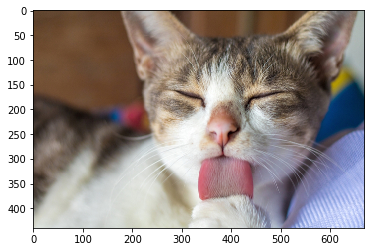

In [18]:
dat = classify_and_plot(IMG_PATH)
df = get_data_from_image(dat, show_img = True)
df.head()

In [12]:
# duplicate rows
"""
row = df.loc[0]
for i in range (0, train.shape[0]): 
    df.loc[i] = row

df
"""

'\nrow = df.loc[0]\nfor i in range (0, train.shape[0]): \n    df.loc[i] = row\n\ndf\n'

In [13]:
# set iamge feature values
"""
for c in columns:
    for i in range(0, train.shape[0]):
        train.iloc[i, train.columns.get_loc(c)] = df[c][0]

train.head(10)
"""

'\nfor c in columns:\n    for i in range(0, train.shape[0]):\n        train.iloc[i, train.columns.get_loc(c)] = df[c][0]\n\ntrain.head(10)\n'

### Correlations:

In [14]:
print(train[['img_mean_color','deal_probability']].corr())

                  img_mean_color  deal_probability
img_mean_color               NaN               NaN
deal_probability             NaN               1.0
